# Excess Mortality And Vaccines In Europe (v2)

**Author:** Justin Garza

**Date:** See below  
  
**Description:**  
This notebook explores excess mortality across Europe, analyzing statistical trends and investigating potential causes through data visualization and interpretation.  

**Content Warning:**    
If you find discussions of death or its underlying factors distressing, please proceed with caution or consider whether this content is right for you.  

In [237]:
from datetime import datetime
from IPython.display import display
from IPython.display import Markdown as MD
current_date = datetime.now().strftime('%Y-%m-%d')
version = datetime.now().strftime('%Y%m%d.%H%M')
display(MD(f"**Date:** {current_date}"))
display(MD(f"**version:** {version}"))

**Date:** 2025-03-02

**version:** 20250302.1717

## Table of Contents

In [238]:
import os
import json5 as json
from IPython.display import display, HTML
from IPython.display import Markdown as MD

nb_path = os.path.join(os.getcwd(),'main.ipynb')

# Read the notebook
with open(nb_path, 'r', encoding='utf-8') as f:
    nb_data = json.load(f)

# Extract headers from markdown cells
outline = []
for cell in nb_data.get("cells", []):
    if cell["cell_type"] == "markdown":
        for line in cell["source"]:
            if line.startswith("#"):  # Markdown header
                level = line.count("#")  # Determine header level
                title = line.lstrip("#").strip()
                outline.append({
                        'text':title,
                        'level':level-1,
                        'link': f"index.html#{title.replace(' ','-')}"
                        })

for i in outline:
    display(HTML(f'<a href=\'{i["link"]}\'>{"____" * i["level"]}{i["text"]}</a>'))



## Prerequisites

### Scientific Method 
The **scientific method** is a systematic approach to investigating natural phenomena, acquiring knowledge, and testing hypotheses. It consists of the following key steps:

1. **Observation**  
   - Identify a problem or phenomenon that needs explanation.
   - Gather initial data through direct observation or research.

2. **Hypothesis**  
   - Propose a testable and falsifiable explanation (a hypothesis).
   - Example: "If plants receive more sunlight, then they will grow taller."

3. **Experimentation**  
   - Design and conduct controlled experiments to test the hypothesis.
   - Include independent and dependent variables, control groups, and repeatable procedures.

4. **Conclusion**  
   - Determine whether the data supports or refutes the hypothesis.
   - Modify or refine the hypothesis if necessary.

5. **Replication**  
   - Repeat experiments to verify results.
   - Publish findings for scrutiny by the scientific community.

   **Rant!: Peer Review is Flawed**  

   Imagine a mechanic repairs my car and then writes a paper about it.  
   Other mechanics review and approve the paper.  
   But when I get my car back, it still won’t start.  
   The mechanic insists, *"But my paper was peer-reviewed!"*  
   No matter how many experts approved the paper, what really matters is whether the experiment—getting the car to run—actually worked.


The scientific method ensures **objectivity, reliability, and accuracy** in scientific inquiry. It is an iterative process, meaning that conclusions can lead to new questions and further investigations.


### Logical Fallacies
Logical fallacies are errors in reasoning that weaken arguments. They can be categorized into **formal** (structural errors) and **informal** (content errors).


| **Type**                 | **Fallacy**                    | **Description** |
|--------------------------|--------------------------------|----------------|
| Formal                   | Affirming the Consequent      | Assuming that if *P → Q* and *Q is true*, then *P must be true*. |
|                          | Denying the Antecedent        | Assuming that if *P → Q* and *P is false*, then *Q must be false*. |
|                          | Non-Sequitur                  | The conclusion does not logically follow from the premises. |
| Informal – Relevance     | **Ad Hominem**                    | Attacking the person instead of the argument. |
|                          | **Straw Man**                     | Misrepresenting an argument to make it easier to attack. |
|                          | **Red Herring**                   | Diverting attention with an irrelevant point. |
|                          | **Appeal to Authority**           | Claiming something is true because an authority said so. |
|                          | **Appeal to Emotion**             | Using emotions instead of logic to argue a point. |
| Informal – Causation & Presumption | Post Hoc Ergo Propter Hoc | Assuming that correlation implies causation. |
|                          | Slippery Slope                | Claiming one action will lead to extreme consequences. |
|                          | False Dilemma                 | Presenting only two options when more exist. |
|                          | Begging the Question          | Using circular reasoning. |
|                          | False Equivalence             | Treating two things as equal when they are not. |
|                          | Hasty Generalization          | Drawing a conclusion from insufficient evidence. |
|                          | No True Scotsman              | Excluding counterexamples by redefining a group. |

Logical fallacies can make arguments misleading or invalid. Identifying them helps improve critical thinking and debate skills.




## Observation 
There were two sides when it comes to the vaccines 
* The covid-19 vaccines were bad, and cause side effects (including death)
* The covid-19 vaccines were good and saved lives.

### News Articles & Headlines
The One side of this can easily be seen in the news headlines, using logical fallacies

#### Ad Hominem Attacks
- [CDC Warns of 'Pandemic of the Unvaccinated'](https://www.cnn.com/videos/health/2021/07/21/delta-variant-coronavirus-vaccines-cohen-newday-vpx.cnn)
- [Covid: French uproar as Macron vows to 'piss off' unvaccinated](https://www.bbc.com/news/world-europe-59873833?utm_source=chatgpt.com)
- [Don Lemon Unloads on Unvaxxed: We Have to ‘Do Things For The Greater Good Of Society, Not For Idiots’](https://www.mediaite.com/tv/don-lemon-unloads-on-unvaxxed-we-have-to-do-things-for-the-greater-good-of-society-not-for-idiots/?utm_source=chatgpt.com)
- [People Who Skip Vaccinations 'Incredibly Selfish' Experts Say](https://www.yahoo.com/lifestyle/people-who-skip-vaccinations-incredibly-selfish-108914416747.html?utm_source=chatgpt.com)
- plague rats
- selfish
- anti-science
- ignorant
- irresponsible.

#### Appeals to Authority 
- [Pope Francis urges people to get vaccinated against Covid-19](https://www.vaticannews.va/en/pope/news/2021-08/pope-francis-appeal-covid-19-vaccines-act-of-love.html)
- [Former Presidents Obama, Bush and Clinton volunteer to get coronavirus vaccine publicly to prove it’s safe](https://www.cnn.com/2020/12/02/politics/obama-vaccine/index.html)
- [FDA Approves First COVID-19 Vaccine](https://www.fda.gov/news-events/press-announcements/fda-approves-first-covid-19-vaccine?utm_source=chatgpt.com)

#### Appeal to Emotions
- [Getting Vaccinated to Help Protect Yourself, Your Family and Your Community](https://www.aha.org/news/perspective/2023-09-29-getting-vaccinated-help-protect-yourself-your-family-and-your-community?utm_source=chatgpt.com)
- [COVID-19 Vaccines Protect the Family, Too](https://www.nih.gov/covid-19-vaccines-protect-family-too?utm_source=chatgpt.com)
- [Concern about loved ones might motivate people to mask up, get vaccine](https://news.umich.edu/concern-about-loved-ones-might-motivate-people-to-mask-up-get-vaccine/?utm_source=chatgpt.com)




## Hypothesis
Given the time elapsed since the COVID-19 pandemic, can we assess the long-term effectiveness of COVID-19 vaccines through available data ?

**Note:** 
This might not be a binary result (even though there are pretty binary sides), 
1. `1.0` The vaccine could have a `possitive effect` in saving lives and getting society back to normal.
2. `0.5` The Vaccine could have a `slightly positive effect`
3. `0.0` The Vaccine could have a `null/no effect`
4. `-0.5` The Vaccine could have a `slightly negative effect`
5. `-1.0` The Vaccine could have a `negative effect`
... and of course we might dissagree on the results, and/or further research might need to be done.  



## Diving into the data.

below we will be 
1. **Experimentation** obtaining data, and producing some charts/graphs.
    * this can't be a real experiment with a control group, since we are limited to the data,but i hope there is enough data to come to some conclusion.
2. **Conclusion** drawing the best conclusion we can from the data
3. **Replication** challening you (the audience) to do approve or disprove the conclusion with your own data science approach.


## Setup
In this section, we prepare the notebook by importing necessary libraries, configuring settings, and setting up directories for data and outputs. The setup ensures the environment is ready for data analysis and visualization.


In [239]:
# this code to will import all the things i need for this notebook

import os
import re
import math

import numpy as np
import pandas as pd

# for the notebook rendering 
from IPython.display import display, HTML
from IPython.display import Markdown as MD


# Graphs and Charts
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# use to export plotly graphs
import plotly.io as pio 

#misc
from scipy.stats import spearmanr, kendalltau
import pycountry

# pandas Settings/Options
pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None)
pd.set_option('display.width', 9000)
pd.set_option('max_colwidth', 400)
pd.set_option('display.float_format', '{:.3f}'.format)

# colormap 
heatmapCM = sns.color_palette('Spectral_r', as_cmap=True)
heatmapCM1 = sns.color_palette('Spectral_r', as_cmap=True)
heatmapCM2 = sns.color_palette('coolwarm', as_cmap=True)
heatmapCM3 = sns.color_palette('viridis_r', as_cmap=True)


## directories 
DIR = os.getcwd()
print(f'{DIR=}')

DataDIR = os.path.join(DIR,'data')
OutDIR = os.path.join(DIR,'docs')

if not os.path.exists(DataDIR):
    print('***DATA FOLDER IS MISSING***')

if not os.path.exists(OutDIR):
    os.makedirs(OutDIR)


DIR='c:\\Users\\JGarza\\GitHub\\Excess_Mortality_And_Vaccines_In_Europe'


## Helping Functions
This section defines utility functions that streamline repetitive tasks and improve code readability. These functions will be used throughout the notebook to simplify operations, enhance modularity, and reduce redundancy.

In [240]:
def df_column_uniquify(df):
    '''
    renames columns that are the same
    '''
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

In [241]:
def abbr_to_isoalpha3(abbr):
    """
    Convert a European country ISO Alpha-2 code to ISO Alpha-3 code.

    Parameters:
        abbreviation (str): ISO Alpha-2 country code (e.g., 'DE' for Germany).

    Returns:
        str: ISO Alpha-3 country code (e.g., 'DEU'), or None if not found.
    """
    try:
        country = pycountry.countries.get(alpha_2=abbr.upper())
        if country:
            return country.alpha_3
        else:
            return None
    except KeyError:
        return None

In [242]:
# this if for converting between the abbreviation andand the names of the countries

country_dict = {
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DE": "Germany",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
    "IS": "Iceland",
    "LI": "Liechtenstein",
    "NO": "Norway",
    "CH": "Switzerland",
    "UK": "United Kingdom",
    "ME": "Montenegro",
    "GE": "Georgia",
    "AL": "Albania",
    "RS": "Serbia",
    "AD": "Andorra",
    "AM": "Armenia"
}

def abbr_to_name(abbreviation):
    return country_dict.get(abbreviation.upper(), "Abbreviation not found")

def name_to_abbr(name):
    reverse_dict = {v: k for k, v in country_dict.items()}
    return reverse_dict.get(name, "Unknown")

# testing
print( abbr_to_name("BE") )  # Output: 'Belgium'
print( name_to_abbr("Belgium") )  # Output: 'BE'

Belgium
BE


## Import and Clean Data

### death data

#### Getting the Data
1. go to [Europa.eu - Database](https://ec.europa.eu/eurostat/databrowser/explore/all/popul)
2. choose 
    * Population and social conditions 
    * Demography, population stock and balance 
    * Deaths by week – special data collection
    * Deaths by week, sex and 20-year age group
3. Click the little table 󰓫
4. customize the data 
    * Customize your dataset -> Time -> From - to 
        * From: 2015-W01
        * To: [Current or Max]
    * Move the `Age Class` under `Geopolitical entity (reporting)`
5. Click `download` (as a spreadsheet) and place the file in the `.\data` folder


<img src='./docs/chrome_rZTvtL3J2L.png' height=400/>

#### variables
* dd = death data (by year and week)
* ddy = death data (by year)
* ddn = normalized deaths (by year)

In [243]:
# getting the data 
dd = pd.read_excel(os.path.join(DataDIR,"demo_r_mwk_20__custom_15220765_page_spreadsheet.xlsx"),sheet_name = "Sheet 1")

# remove the headers
dd = dd.iloc[7::]

# drop the bad columns
for c in dd.columns:
    if pd.isnull(dd.at[7,c]):
        dd = dd.drop(columns=[c])

# rename time columns
for c in dd.columns:
    name = dd.at[7,c]
    dd = dd.rename(columns={c: name})

# make the duplicate column names unique
dd = df_column_uniquify(dd)

# # rename the first two columns
dd = dd.rename(columns={'TIME': 'abbr'})
dd = dd.rename(columns={'TIME_1':'name'})
dd = dd.rename(columns={'TIME_2':'agegrp'})
dd = dd.rename(columns={'TIME_3':'agegrp_desc'})
           
# drop, replace, reset index,
dd = dd.drop([7,8,9])
dd = dd.replace(to_replace=':', value=None)
dd = dd.reset_index(drop=True)

# display(dd.head(3))
display(dd.tail(10))

c:\Users\JGarza\pythons\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,abbr,name,agegrp,agegrp_desc,2015-W01,2015-W02,2015-W03,2015-W04,2015-W05,2015-W06,2015-W07,2015-W08,2015-W09,2015-W10,2015-W11,2015-W12,2015-W13,2015-W14,2015-W15,2015-W16,2015-W17,2015-W18,2015-W19,2015-W20,2015-W21,2015-W22,2015-W23,2015-W24,2015-W25,2015-W26,2015-W27,2015-W28,2015-W29,2015-W30,2015-W31,2015-W32,2015-W33,2015-W34,2015-W35,2015-W36,2015-W37,2015-W38,2015-W39,2015-W40,2015-W41,2015-W42,2015-W43,2015-W44,2015-W45,2015-W46,2015-W47,2015-W48,2015-W49,2015-W50,2015-W51,2015-W52,2015-W53,2016-W01,2016-W02,2016-W03,2016-W04,2016-W05,2016-W06,2016-W07,2016-W08,2016-W09,2016-W10,2016-W11,2016-W12,2016-W13,2016-W14,2016-W15,2016-W16,2016-W17,2016-W18,2016-W19,2016-W20,2016-W21,2016-W22,2016-W23,2016-W24,2016-W25,2016-W26,2016-W27,2016-W28,2016-W29,2016-W30,2016-W31,2016-W32,2016-W33,2016-W34,2016-W35,2016-W36,2016-W37,2016-W38,2016-W39,2016-W40,2016-W41,2016-W42,2016-W43,2016-W44,2016-W45,2016-W46,2016-W47,2016-W48,2016-W49,2016-W50,2016-W51,2016-W52,2017-W01,2017-W02,2017-W03,2017-W04,2017-W05,2017-W06,2017-W07,2017-W08,2017-W09,2017-W10,2017-W11,2017-W12,2017-W13,2017-W14,2017-W15,2017-W16,2017-W17,2017-W18,2017-W19,2017-W20,2017-W21,2017-W22,2017-W23,2017-W24,2017-W25,2017-W26,2017-W27,2017-W28,2017-W29,2017-W30,2017-W31,2017-W32,2017-W33,2017-W34,2017-W35,2017-W36,2017-W37,2017-W38,2017-W39,2017-W40,2017-W41,2017-W42,2017-W43,2017-W44,2017-W45,2017-W46,2017-W47,2017-W48,2017-W49,2017-W50,2017-W51,2017-W52,2018-W01,2018-W02,2018-W03,2018-W04,2018-W05,2018-W06,2018-W07,2018-W08,2018-W09,2018-W10,2018-W11,2018-W12,2018-W13,2018-W14,2018-W15,2018-W16,2018-W17,2018-W18,2018-W19,2018-W20,2018-W21,2018-W22,2018-W23,2018-W24,2018-W25,2018-W26,2018-W27,2018-W28,2018-W29,2018-W30,2018-W31,2018-W32,2018-W33,2018-W34,2018-W35,2018-W36,2018-W37,2018-W38,2018-W39,2018-W40,2018-W41,2018-W42,2018-W43,2018-W44,2018-W45,2018-W46,2018-W47,2018-W48,2018-W49,2018-W50,2018-W51,2018-W52,2019-W01,2019-W02,2019-W03,2019-W04,2019-W05,2019-W06,2019-W07,2019-W08,2019-W09,2019-W10,2019-W11,2019-W12,2019-W13,2019-W14,2019-W15,2019-W16,2019-W17,2019-W18,2019-W19,2019-W20,2019-W21,2019-W22,2019-W23,2019-W24,2019-W25,2019-W26,2019-W27,2019-W28,2019-W29,2019-W30,2019-W31,2019-W32,2019-W33,2019-W34,2019-W35,2019-W36,2019-W37,2019-W38,2019-W39,2019-W40,2019-W41,2019-W42,2019-W43,2019-W44,2019-W45,2019-W46,2019-W47,2019-W48,2019-W49,2019-W50,2019-W51,2019-W52,2020-W01,2020-W02,2020-W03,2020-W04,2020-W05,2020-W06,2020-W07,2020-W08,2020-W09,2020-W10,2020-W11,2020-W12,2020-W13,2020-W14,2020-W15,2020-W16,2020-W17,2020-W18,2020-W19,2020-W20,2020-W21,2020-W22,2020-W23,2020-W24,2020-W25,2020-W26,2020-W27,2020-W28,2020-W29,2020-W30,2020-W31,2020-W32,2020-W33,2020-W34,2020-W35,2020-W36,2020-W37,2020-W38,2020-W39,2020-W40,2020-W41,2020-W42,2020-W43,2020-W44,2020-W45,2020-W46,2020-W47,2020-W48,2020-W49,2020-W50,2020-W51,2020-W52,2020-W53,2021-W01,2021-W02,2021-W03,2021-W04,2021-W05,2021-W06,2021-W07,2021-W08,2021-W09,2021-W10,2021-W11,2021-W12,2021-W13,2021-W14,2021-W15,2021-W16,2021-W17,2021-W18,2021-W19,2021-W20,2021-W21,2021-W22,2021-W23,2021-W24,2021-W25,2021-W26,2021-W27,2021-W28,2021-W29,2021-W30,2021-W31,2021-W32,2021-W33,2021-W34,2021-W35,2021-W36,2021-W37,2021-W38,2021-W39,2021-W40,2021-W41,2021-W42,2021-W43,2021-W44,2021-W45,2021-W46,2021-W47,2021-W48,2021-W49,2021-W50,2021-W51,2021-W52,2022-W01,2022-W02,2022-W03,2022-W04,2022-W05,2022-W06,2022-W07,2022-W08,2022-W09,2022-W10,2022-W11,2022-W12,2022-W13,2022-W14,2022-W15,2022-W16,2022-W17,2022-W18,2022-W19,2022-W20,2022-W21,2022-W22,2022-W23,2022-W24,2022-W25,2022-W26,2022-W27,2022-W28,2022-W29,2022-W30,2022-W31,2022-W32,2022-W33,2022-W34,2022-W35,2022-W36,2022-W37,2022-W38,2022-W39,2022-W40,2022-W41,2022-W42,2022-W43,2022-W44,2022-W45,2022-W46,2022-W47,2022-W48,2022-W49,2022-W50,2022-W51,2022-W52,2023-W01,2023-W02,2023-W03,2023-W04,2023-W05,2023-W06,2023-W07,2023-W08,2023-W09,2023-W10,2023-W11,2023-W12,2023-W13,2023-W14,2023-W15,2023-W16,2023-W17,2023-W18,2023-W19,2023-W20,2023-W21,2023-W22,2023-W23,2

In [244]:
# This code processes the raw death data (dd) by restructuring it into a long-form dataframe. 
# Each row in the new dataframe represents a single country's deaths for a specific year and week, 
# along with additional metadata such as country abbreviations and derived values.

temp = dd.melt(id_vars=['name','abbr','agegrp','agegrp_desc'],var_name='year-week',value_name='deaths')
temp['year'] = pd.to_numeric(temp['year-week'].str[0:4])
temp['week'] = pd.to_numeric(temp['year-week'].str[6:8])
temp['year.week'] = temp['year'] + temp['week']/100
temp['year.p'] = temp['year'] + (temp['week']/53.001)
dd = temp



In [245]:
# lets remove some data we don't need

# this is a combination of 27 countries
dd = dd[dd['abbr']!= 'EU27_2020'] 


dd = dd[dd['abbr']!= 'not available']
dd = dd[dd['abbr']!= 'Special value']
dd = dd[dd['abbr']!= 'None']
dd = dd[dd['abbr']!= 'Observation flags:']
dd = dd[dd['abbr']!= 'p']

# too early for 2025
dd = dd[dd['year']!= 2025]

dd = dd[~dd['name'].isna()]
dd = dd[~dd['agegrp'].isna()]

# we don't need these columns 
dd.drop(columns=['agegrp_desc'], inplace=True)
dd.drop(columns=['year-week'], inplace=True)

# converting columns 
dd['deaths'] = pd.to_numeric(dd['deaths'])

In [246]:
# there are quite a few NAN (not a number) values
# here we get rid of them 

# Get counts of NA values for each 'abbr' group
na_counts = dd[dd.deaths.isna()].groupby(['abbr','agegrp']).size()

# Filter for 'abbr' groups with more than 12 NA values
filtered_abbrs = na_counts[na_counts > 12*5].index

for abbr, agegrp in filtered_abbrs:
    print(f'removing -- {abbr} {abbr_to_name(abbr)} {agegrp} NACount={na_counts[(abbr, agegrp)]}')
    # Corrected filtering condition: remove rows where abbr and agegrp match separately
    dd = dd[~((dd.abbr == abbr) & (dd.agegrp == agegrp))]  # Use bitwise AND & inside the negation
    # print(len(dd))

removing -- AD Andorra TOTAL NACount=261
removing -- AD Andorra Y20-39 NACount=261
removing -- AD Andorra Y40-59 NACount=261
removing -- AD Andorra Y60-79 NACount=261
removing -- AD Andorra Y_GE80 NACount=261
removing -- AD Andorra Y_LT20 NACount=261
removing -- AL Albania TOTAL NACount=171
removing -- AL Albania Y20-39 NACount=171
removing -- AL Albania Y40-59 NACount=171
removing -- AL Albania Y60-79 NACount=171
removing -- AL Albania Y_GE80 NACount=171
removing -- AL Albania Y_LT20 NACount=171
removing -- GE Georgia TOTAL NACount=208
removing -- GE Georgia Y20-39 NACount=208
removing -- GE Georgia Y40-59 NACount=208
removing -- GE Georgia Y60-79 NACount=208
removing -- GE Georgia Y_GE80 NACount=208
removing -- GE Georgia Y_LT20 NACount=208
removing -- IE Ireland Y20-39 NACount=522
removing -- IE Ireland Y40-59 NACount=522
removing -- IE Ireland Y60-79 NACount=522
removing -- IE Ireland Y_GE80 NACount=522
removing -- IE Ireland Y_LT20 NACount=522
removing -- UK United Kingdom TOTAL N

In [247]:
# Fill missing values (NaNs) in the 2024 data with the mean deaths for 2024 by country

# Filter data for the year 2024
df_2024 = dd[dd.year == 2024]

# Group the 2024 data by country abbreviation ('abbr') and calculate summary statistics
grouped = df_2024.groupby(['abbr','agegrp'])

# Compute statistics: mean, total count, number of NaNs, total deaths, and mean deaths per week
stats = grouped['deaths'].agg(
    Mean='mean',                        # Average deaths for each country in 2024
    Count='size',                       # Total number of records for each country in 2024
    NACount=lambda x: x.isna().sum(),   # Count of missing (NaN) values
    SumFor2024='sum'                    # Total deaths for each country in 2024
).reset_index()

# Replace missing death values in 2024 with the calculated mean for each country
for _, row in stats.iterrows():
    dd.loc[
        (dd.abbr == row['abbr']) & (dd.agegrp == row['agegrp']) & (dd.year == 2024) & (dd.deaths.isna()), 
        'deaths'
    ] = row['Mean']

In [248]:

# we are going to create a new age group, everyone less than 80
# LT80 is less than 80 years old

# exclude where the age is greater than 80
temp = dd.copy()
temp = temp[temp['agegrp'] != 'TOTAL']
temp = temp[temp['agegrp'] != 'Y_GE80']

temp = pd.pivot_table(
    temp, 
    values='deaths', 
    index=['name', 'abbr','year','week','year.week','year.p'], 
    aggfunc='sum'
)
temp = temp.reset_index()

temp['agegrp'] = 'LT80'

dd = pd.concat([dd,temp])

In [249]:
# checking the data
display(dd.head(5))
display(dd.tail(5))

,name,abbr,agegrp,deaths,year,week,year.week,year.p
5,Belgium,BE,TOTAL,2461.000,2015,1,2015.010,2015.019
6,Belgium,BE,Y_LT20,19.000,2015,1,2015.010,2015.019
7,Belgium,BE,Y20-39,34.000,2015,1,2015.010,2015.019
8,Belgium,BE,Y40-59,191.000,2015,1,2015.010,2015.019
9,Belgium,BE,Y60-79,756.000,2015,1,2015.010,2015.019


,name,abbr,agegrp,deaths,year,week,year.week,year.p
17221,Switzerland,CH,LT80,479.619,2024,48,2024.480,2024.906
17222,Switzerland,CH,LT80,479.619,2024,49,2024.490,2024.925
17223,Switzerland,CH,LT80,479.619,2024,50,2024.500,2024.943
17224,Switzerland,CH,LT80,479.619,2024,51,2024.510,2024.962
17225,Switzerland,CH,LT80,479.619,2024,52,2024.520,2024.981


In [250]:
# save to out folder
dd.to_csv(r'out\death_data.csv',index=False)

In [251]:

ddy = pd.pivot_table(
    dd,
    values='deaths',
    index=['name', 'abbr','agegrp','year'], 
    aggfunc='sum'
)
ddy = ddy.reset_index()

display(ddy.head(5))
display(ddy.tail(5))

# save to out folder
ddy.to_csv(r'out\death_data_year.csv',index=False)

,name,abbr,agegrp,year,deaths
0,Armenia,AM,LT80,2015,17785.000
1,Armenia,AM,LT80,2016,17334.000
2,Armenia,AM,LT80,2017,16426.000
3,Armenia,AM,LT80,2018,15379.000
4,Armenia,AM,LT80,2019,14880.000


,name,abbr,agegrp,year,deaths
2315,Switzerland,CH,Y_LT20,2020,491.000
2316,Switzerland,CH,Y_LT20,2021,468.000
2317,Switzerland,CH,Y_LT20,2022,511.000
2318,Switzerland,CH,Y_LT20,2023,451.000
2319,Switzerland,CH,Y_LT20,2024,407.333


In [252]:
# here we normalize the death values

ddn = ddy.copy()
ddn['deaths_norm'] = 0.0

## baseline years are 2015,2016,2017 before the pandemic 
blyears = ddn[ddn.year.isin([2015,2016,2017])]
grouped = blyears.groupby(['abbr','agegrp'])

# Compute baseline mean
temp = grouped['deaths'].agg(
    baseline='mean',
).reset_index()

# Merge baseline means with the original DataFrame
ddn = ddn.merge(temp, on=['abbr', 'agegrp'], how='left')

# Normalize deaths column
ddn['deaths_norm'] = ddn['deaths'] / ddn['baseline']

# Drop the intermediate baseline column if not needed
ddn.drop(columns=['baseline'], inplace=True)

# save to out folder
ddn.to_csv(r'out\death_data_norm.csv',index=False)

### cause of death 

#### Getting the Data
1. go to [Europa.eu - Database](https://ec.europa.eu/eurostat/databrowser/explore/all/popul)
2. choose 
    * Population and social conditions 
    * Health
    * Causes of death
    * General mortality
    * Causes of death - deaths by country of residence and occurrence
3. Click the little table 󰓫
4. customize the data 
    * Customize your dataset -> Time -> From - to 
        * From: 2015
        * To: [Current or Max]
    * Customize your dataset -> `International Statistical Classification of Diseases and Related Health Problems (ICD-10 2010)`
        * All
            * UnCheck All
        * Aggregates
            * All Checked
    * Move the ``International Statistical Classification...` under `Geopolitical entity (reporting)`
5. Click `download` (as a spreadsheet) and place the file in the `.\data` folder


<img src='./docs/chrome_Gmc2itqQye.png' height=200/>

#### variables
* cod = cause of death data
* codn = cod, normalized


In [253]:
# getting the data 
cod = pd.read_excel(os.path.join(DataDIR,"hlth_cd_aro__custom_15177032_page_spreadsheet.xlsx"),sheet_name = "Sheet 1")

# remove the headers
cod = cod.iloc[9::]

# drop the bad columns
for c in cod.columns:
    if pd.isnull(cod.at[9,c]):
        cod = cod.drop(columns=[c])

# rename time columns
for c in cod.columns:
    name = cod.at[9,c]
    cod = cod.rename(columns={c: name})

# make the duplicate column names unique
cod = df_column_uniquify(cod)

# # rename the first two columns
cod = cod.rename(columns={'TIME': 'name'})
cod = cod.rename(columns={'TIME_1':'cod'})
           
# drop, replace, reset index,
cod = cod.drop([9,10])
cod = cod.replace(to_replace=':', value=None)
cod = cod.reset_index(drop=True)

cod['abbr'] = cod['name'].apply(name_to_abbr)

# display(cod.head(5))

c:\Users\JGarza\pythons\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [254]:
# This code processes the raw cod data (cod) by restructuring it into a long-form dataframe. 
# along with additional metadata such as country abbreviations and derived values.

temp = cod.melt(id_vars=['name','abbr','cod'],var_name='year',value_name='deaths')
temp['year'] = pd.to_numeric(temp['year'])
cod = temp

# display(cod.head(10))

In [255]:
# lets remove some data we don't need

# this is a combination of 27 countries
cod.loc[cod['name']== 'European Union - 27 countries (from 2020)','abbr'] = 'Euro27'


cod = cod[cod['name']!= 'not available']
cod = cod[cod['name']!= 'Special value']
cod = cod[cod['name']!= 'None']
cod = cod[cod['name']!= 'Observation flags:']
cod = cod[cod['name']!= 'p']
cod = cod[cod['name']!= 'Nan']
cod = cod[cod['name']!= 'd']

cod = cod[~cod['name'].isna()]

# display(cod.tail(10))

In [256]:
# if a cause of death is null, we'll fill it with 0
cod['deaths'].fillna(0, inplace=True)

C:\Users\JGarza\AppData\Local\Temp\ipykernel_2148\2938650696.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\JGarza\AppData\Local\Temp\ipykernel_2148\2938650696.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [257]:
# save to out folder
cod.to_csv(r'out\cod_data.csv',index=False)

In [258]:
# here we normalize the cod data 

codn = cod.copy()
codn['deaths_norm'] = np.nan

## baseline years are 2015,2016,2017 before the pandemic 
blyears = codn[codn.year.isin([2015,2016,2017])]
grouped = blyears.groupby(['name','cod'])

# Compute baseline mean
temp = grouped['deaths'].agg(
    baseline='mean',
).reset_index()

# Merge baseline means with the original DataFrame
codn = codn.merge(temp, on=['name', 'cod'], how='left')

codn['baseline'] = codn['baseline'].replace(0, np.nan)

# set the death_norm to deaths/balseline
# * if the baseline is not NA
# * if the deaths is not NA
codn.loc[(~codn['baseline'].isna()) & (~codn['deaths'].isna()), 'deaths_norm'] = codn['deaths'] / codn['baseline']

# Drop the intermediate baseline column if not needed
codn.drop(columns=['baseline'], inplace=True)

# # save to out folder
codn.to_csv(r'out\cod_data_norm.csv',index=False)

# display(codn.head(1000))


PermissionError: [Errno 13] Permission denied: 'out\\cod_data_norm.csv'

### vaccine data 

#### Getting the Data
1. Go to [https://www.ecdc.europa.eu/](https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea)
2. Click the `Download in CSV`.


#### variables
* vd = vaccine data

In [ ]:
# import Vaccine Data 
vd = pd.read_csv(os.path.join(DataDIR,'data.csv'))

# create a year column
vd['year'] = pd.to_numeric(vd['YearWeekISO'].str[0:4])

# renaming columns for shorter names
vd = vd.rename(columns={'ReportingCountry':'abbr'})
vd = vd.rename(columns={'Vaccine':'vacc'})
vd = vd.rename(columns={'FirstDose':'dose1'})
vd = vd.rename(columns={'SecondDose':'dose2'})
vd = vd.rename(columns={'DoseAdditional1':'doesA1'})
vd = vd.rename(columns={'DoseAdditional2':'doesA2'})
vd = vd.rename(columns={'DoseAdditional3':'doesA3'})
vd = vd.rename(columns={'DoseAdditional4':'doesA4'})
vd = vd.rename(columns={'DoseAdditional5':'doesA5'})
vd = vd.rename(columns={'UnknownDose':'doseUNK'})

doseCol = ['dose1','dose2','doesA1','doesA2','doesA3','doesA4','doesA5','doseUNK']
# calculate the sum of all the Doses
vd = pd.pivot_table(
    data = vd,
    values = doseCol,
    index = ['abbr','year','Population','vacc'],
    aggfunc="sum"
    )
vd = vd.reset_index()

# gets get the total doses given 
vd['total_dose'] = vd[doseCol].sum(axis=1)
doseCol.append('total_dose')

# lets make a new record for all vaccines
temp = pd.pivot_table(
    data = vd,
    values = doseCol,
    index = ['abbr','year','Population'],
    aggfunc="sum"
    )
temp = temp.reset_index()
temp['vacc'] = 'All'

# and add it to all the vaccine data
vd = pd.concat([vd,temp])

vd['td_sum'] = vd.groupby(['abbr','vacc'])['total_dose'].cumsum()
vd['dose_pop_ratio'] = vd['td_sum']/vd['Population']

## normalizsed version
vd['dpr_norm'] = (vd['dose_pop_ratio'] - vd['dose_pop_ratio'].min()) / (vd['dose_pop_ratio'].max() - vd['dose_pop_ratio'].min())

vd['name'] = vd.abbr.apply(abbr_to_name)

display(vd.head(5))
display(vd.tail(5))

# save to out folder
vd.to_csv(r'out\vacc_data.csv',index=False)


,abbr,year,Population,vacc,doesA1,doesA2,doesA3,doesA4,doesA5,dose1,dose2,doseUNK,total_dose,td_sum,dose_pop_ratio,dpr_norm,name
0,AT,2020,8901064,AZ,0,0,0,0,0,0,0,0,0,0,0.000,0.000,Austria
1,AT,2020,8901064,COM,0,0,0,0,0,10702,0,0,10702,10702,0.001,0.000,Austria
2,AT,2020,8901064,COMBA.1,0,0,0,0,0,4,0,0,4,4,0.000,0.000,Austria
3,AT,2020,8901064,COMBA.4-5,0,0,0,0,0,0,0,0,0,0,0.000,0.000,Austria
4,AT,2020,8901064,JANSS,0,0,0,0,0,0,0,0,0,0,0.000,0.000,Austria


,abbr,year,Population,vacc,doesA1,doesA2,doesA3,doesA4,doesA5,dose1,dose2,doseUNK,total_dose,td_sum,dose_pop_ratio,dpr_norm,name
113,SI,2023,2107180,All,992,6571,0,0,0,348,562,0,8473,5973989,2.835,0.190,Slovenia
114,SK,2020,5457873,All,0,0,0,0,0,9074,10,0,9084,9084,0.002,0.000,Slovakia
115,SK,2021,5459781,All,2207200,10,0,0,0,5417526,4894039,0,12518775,12527859,2.295,0.154,Slovakia
116,SK,2022,5434712,All,1155790,147247,1339,0,0,117886,215301,0,1637563,14165422,2.606,0.175,Slovakia
117,SK,2023,5434712,All,1331,9468,973,0,0,798,648,0,13218,14178640,2.609,0.175,Slovakia


## combine all data

### variables
cd = combined data


In [ ]:
cols = ['name','abbr', 'year','source', 'filter','value_type','value']

cd = pd.DataFrame(columns=cols)


# deaths data 
temp = ddy.copy()

temp['source'] = 'deaths'
temp['filter'] = temp['agegrp']
temp['value_type'] = 'value'
temp['value'] = temp['deaths']

for c in temp.columns:
    if c not in cols:
        temp = temp.drop(columns=[c])

cd = pd.concat([cd,temp])

# deaths data normalized 

temp = ddn.copy()

temp['source'] = 'deaths'
temp['filter'] = temp['agegrp']
temp['value_type'] = 'normalized'
temp['value'] = temp['deaths_norm']

for c in temp.columns:
    if c not in cols:
        temp = temp.drop(columns=[c])

cd = pd.concat([cd,temp])

# cause of death data

temp = cod.copy()

temp['source'] = 'cause_of_death'
temp['filter'] = temp['cod']
temp['value_type'] = 'value'
temp['value'] = temp['deaths']

for c in temp.columns:
    if c not in cols:
        temp = temp.drop(columns=[c])

cd = pd.concat([cd,temp])


# cause of death data normalized

temp = codn.copy()

temp['source'] = 'cause_of_death'
temp['filter'] = temp['cod']
temp['value_type'] = 'normalized'
temp['value'] = temp['deaths_norm']

for c in temp.columns:
    if c not in cols:
        temp = temp.drop(columns=[c])

cd = pd.concat([cd,temp])

# Vaccine Data - total_dose

temp = vd.copy()

temp['source'] = 'vaccine'
temp['filter'] = temp['vacc']
temp['value_type'] = 'value (total_dose)'
temp['value'] = temp['total_dose']

for c in temp.columns:
    if c not in cols:
        temp = temp.drop(columns=[c])

cd = pd.concat([cd,temp])

# Vaccine Data - dose_pop_ratio
temp = vd.copy()

temp['source'] = 'vaccine'
temp['filter'] = temp['vacc']
temp['value_type'] = 'ratio (total_dose/pop.)'
temp['value'] = temp['dose_pop_ratio']

for c in temp.columns:
    if c not in cols:
        temp = temp.drop(columns=[c])

cd = pd.concat([cd,temp])

# Vaccine Data - dpr_norm
temp = vd.copy()

temp['source'] = 'vaccine'
temp['filter'] = temp['vacc']
temp['value_type'] = 'normalized (total_dose/pop.)'
temp['value'] = temp['dpr_norm']

for c in temp.columns:
    if c not in cols:
        temp = temp.drop(columns=[c])

cd = pd.concat([cd,temp])


display(cd.tail(5))
display(cd[(cd['source'] == 'deaths') & (cd['value_type'] == 'normalized')].tail(5))

# save to out folder
cd.to_csv(r'out\combined_data.csv',index=False)


C:\Users\JGarza\AppData\Local\Temp\ipykernel_2148\1882701906.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,name,abbr,year,source,filter,value_type,value
113,Slovenia,SI,2023,vaccine,All,normalized (total_dose/pop.),0.190
114,Slovakia,SK,2020,vaccine,All,normalized (total_dose/pop.),0.000
115,Slovakia,SK,2021,vaccine,All,normalized (total_dose/pop.),0.154
116,Slovakia,SK,2022,vaccine,All,normalized (total_dose/pop.),0.175
117,Slovakia,SK,2023,vaccine,All,normalized (total_dose/pop.),0.175


,name,abbr,year,source,filter,value_type,value
2315,Switzerland,CH,2020,deaths,Y_LT20,normalized,0.974
2316,Switzerland,CH,2021,deaths,Y_LT20,normalized,0.929
2317,Switzerland,CH,2022,deaths,Y_LT20,normalized,1.014
2318,Switzerland,CH,2023,deaths,Y_LT20,normalized,0.895
2319,Switzerland,CH,2024,deaths,Y_LT20,normalized,0.808


In [ ]:
sources = cd['source'].drop_duplicates().to_list()

for s in sources:
    print('sources',s)
    filters = cd[cd['source']==s]['filter'].drop_duplicates().to_list()
    print('filters')
    print('\t',filters)
    value_types = cd[cd['source']==s]['value_type'].drop_duplicates().to_list()
    print('value_types')
    print('\t',value_types)
    print('---')



sources deaths
filters
	 ['LT80', 'TOTAL', 'Y20-39', 'Y40-59', 'Y60-79', 'Y_GE80', 'Y_LT20']
value_types
	 ['value', 'normalized']
---
sources cause_of_death
filters
	 ['Total', 'Certain infectious and parasitic diseases (A00-B99)', 'Tuberculosis', 'Viral hepatitis and sequelae of viral hepatitis', 'Chronic viral hepatitis B and C', 'Human immunodeficiency virus [HIV] disease', 'Other infectious and parasitic diseases (remainder of A00-B99)', 'Neoplasms', 'Malignant neoplasm of lip, oral cavity, pharynx', 'Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal', 'Malignant neoplasm of trachea, bronchus and lung', 'Malignant neoplasm of other parts of uterus', 'Malignant neoplasm of brain and central nervous system', 'Hodgkin disease and lymphomas', 'Other malignant neoplasm of lymphoid, haematopoietic and related tissue', 'Leukaemia', 'Other malignant neoplasms (remainder of C00-C97)', 'Non-malignant neoplasms (benign and uncertain)', 'Diseases of the blood and

## Lets Visualize the Data

### Line Charts - normalized deaths

* Note
the chart below shows that all the countries went through the pandemic 2020-2021,
however some countries recovered (1.0 or less), and other countries still have higher than normal death rates (over 1.0).


In [ ]:
title = 'Line Chart - normalized deaths in Europe 2015-2024 (by year)'
display(MD(f'### {title}'))

temp = cd[(cd['source']=='deaths') & (cd['filter']=='TOTAL') & (cd['value_type']=='normalized')]
temp = temp.sort_values(by='value', ascending=True)
temp = temp.sort_values(by='year', ascending=True)

fig = px.line(
    temp,
    x='year',
    y='value',
    color='name',
    height=750 ,
    hover_data={
        'name', 'abbr', 'value'
    },
    title=title
    )
fig.update_layout(template="plotly_dark")

### Line Chart - normalized deaths in Europe 2015-2024 (by year)

In [ ]:
title = 'Line Chart - normalized deaths in Europe 2015-2024 (by year)'
display(MD(f'### {title}'))

subtitle = 'Only the top 5 values in 2024, and the bottom 5 values in 2024'
display(MD(f'#### {subtitle}'))

temp = cd[(cd['source']=='deaths') & (cd['filter']=='TOTAL') & (cd['value_type']=='normalized')]

head2024 = temp[(temp['year']==2024)].sort_values(by='value', ascending=False).head(5)
tail2024 = temp[(temp['year']==2024)].sort_values(by='value', ascending=False).tail(5)


temp = temp[
    (temp['name'].isin(head2024.name))
    | (temp['name'].isin(tail2024.name))
    ]


temp = temp.sort_values(by='value', ascending=True)
temp = temp.sort_values(by='year', ascending=True)

fig = px.line(
    temp,
    x='year',
    y='value',
    color='name',
    height=750 ,
    hover_data={
        'name', 'abbr', 'value'
    },
    title=title
    )
fig.update_layout(template="plotly_dark")

### Line Chart - normalized deaths in Europe 2015-2024 (by year)

#### Only the top 5 values in 2024, and the bottom 5 values in 2024

* Note
here we can see some data might not be trust-worthy.
see `Liechtenstein`


In [ ]:
title = 'Line Chart - normalized deaths in Europe 2015-2024 (by year)'
display(MD(f'### {title}'))

display(MD(f'#### Only the top 5 values in 2024, and the bottom 5 values in 2024'))
display(MD(f'#### Only where the deaths are from people who are less than 80 years old'))

temp = cd[(cd['source']=='deaths') & (cd['filter']=='LT80') & (cd['value_type']=='normalized')]

head2024 = temp[(temp['year']==2024)].sort_values(by='value', ascending=False).head(5)
tail2024 = temp[(temp['year']==2024)].sort_values(by='value', ascending=False).tail(5)


temp = temp[
    (temp['name'].isin(head2024.name))
    | (temp['name'].isin(tail2024.name))
    ]

temp = temp.sort_values(by='value', ascending=True)
temp = temp.sort_values(by='year', ascending=True)


fig = px.line(
    temp,
    x='year',
    y='value',
    color='name',
    height=750 ,
    hover_data={
        'name', 'abbr', 'value'
    },
    title=title
    )
fig.update_layout(template="plotly_dark")

### Line Chart - normalized deaths in Europe 2015-2024 (by year)

#### Only the top 5 values in 2024, and the bottom 5 values in 2024

#### Only where the deaths are from people who are less than 80 years old

### HeatMaps of deaths by AgeGroups

* Note  
we can see it a pattern where the older the agegroup is the more they experience higher the death rates in the post-pandemic years.
however look at `Iceland` and `Netherlands` with the `Y20-39` agegroup ... they still experience a higher death rate even though this is a pretty young age group.

* Note  
Something to note is that not all the agegroups where recommended the vaccine in the same way.

Me: 
<p style="color: white; background-color: blue; padding: 10px; border-radius: 10px;">
is there a source that shows european countries recommended the vaccine to older people ?  
</p>

ChatGPT:
<p style="color: white; background-color:rgb(70, 70, 70); padding: 10px; border-radius: 10px;">
Yes, European countries have strongly recommended COVID-19 vaccination for older adults due to their increased risk of severe illness. The European Centre for Disease Prevention and Control (ECDC) has emphasized the importance of vaccinating high-risk groups, including the elderly. In October 2024, the ECDC reported that vaccination uptake among these groups was suboptimal in several EU/EEA Member States during the 2023–2024 season, underscoring the need for increased efforts to protect older populations. 
<a href='https://www.ecdc.europa.eu/en/news-events/increased-flu-and-covid-19-vaccination-coverage-recommended-risk-groups-eueea-ahead?utm_source=chatgpt.com'>ecdc.europa.eu</a>
<br />
<br />
Additionally, the World Health Organization's Regional Office for Europe conducted a study published in October 2024, highlighting that COVID-19 vaccines prevented over half of COVID-19-related hospitalizations and severe outcomes, including death, particularly among older adults and those with underlying conditions. This finding reinforces the critical role of vaccination in safeguarding the health of the elderly population in Europe. 
<a href='https://www.who.int/europe/news-room/23-10-2024-vaccines-for-the-vulnerable--new-who-europe-study-shows-the-impact-of-covid-19-vaccines-in-safeguarding-health-and-saving-lives?utm_source=chatgpt.com'>who.int/europe</a>
<br />
<br />
These recommendations and findings reflect a concerted effort across European health authorities to prioritize COVID-19 vaccination for older adults to mitigate severe health outcomes associated with the virus. 
</p>


In [ ]:
display(MD('### HeatMap (of deaths based on age groups)'))

agegrps = cd[(cd['source']=='deaths')]['filter'].drop_duplicates().to_list()

for ag in agegrps:
    display(MD(f'#### {ag}'))
    temp = cd[(cd['source']=='deaths') & (cd['filter']==ag) & (cd['value_type']=='normalized')]

    temp = pd.pivot_table(
        data = temp,
        values = 'value',
        index = ['abbr','name','filter','value_type'],
        columns=['year'],
        aggfunc='mean',
    )
    temp.columns.name = 'index' 
    temp = temp.reset_index()

    ## sum of post pandemic deaths
    sppd = pd.pivot_table(
        cd[(cd['source']=='deaths') & (cd['filter']==ag) & (cd['value_type']=='normalized') & (cd['year'] > 2023)], # totals only 
        values = 'value',
        index = ['abbr','name'],
        aggfunc='sum',
    )
    sppd = sppd.reset_index()
    sppd = sppd.sort_values(by='value',ascending=False)
    
    temp = temp.set_index('name').reindex(sppd['name']).reset_index()

    display(temp.style.background_gradient(cmap=heatmapCM,axis=1))



### HeatMap (of deaths based on age groups)

#### LT80

index,name,abbr,filter,value_type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Iceland,IS,LT80,normalized,0.963504,1.036496,1.000000,1.019812,1.012513,1.105318,1.123045,1.273201,1.211679,1.256991
1,Malta,MT,LT80,normalized,1.017293,0.967203,1.015504,1.057841,1.036971,1.166369,1.196780,1.207513,1.124031,1.158677
2,Netherlands,NL,LT80,normalized,1.009040,0.998123,0.992837,1.013964,1.004492,1.114691,1.143528,1.122958,1.113380,1.110753
3,Norway,NO,LT80,normalized,1.003819,0.998207,0.997974,1.013113,1.015627,1.033864,1.050348,1.137911,1.107398,1.106405
4,Liechtenstein,LI,LT80,normalized,0.876923,1.107692,1.015385,1.007692,0.946154,1.115385,0.976923,0.000000,0.953846,1.092308
5,France,FR,LT80,normalized,1.012897,0.989268,0.997835,1.006304,1.003646,1.094593,1.112343,1.124722,1.086984,1.075147
6,Spain,ES,LT80,normalized,1.029906,0.983827,0.986268,0.997999,0.994437,1.164643,1.109420,1.114142,1.082376,1.065384
7,Cyprus,CY,LT80,normalized,1.026756,0.958661,1.014583,1.020289,1.053005,1.140122,1.280878,1.213923,1.143546,1.059914
8,Finland,FI,LT80,normalized,1.000246,1.000328,0.999426,0.998402,0.988075,1.026145,1.040611,1.090771,1.100033,1.044840
9,Luxembourg,LU,LT80,normalized,0.979849,0.945681,1.074470,1.028211,1.006658,1.077098,1.061854,1.024006,1.026108,1.027335


#### TOTAL

index,name,abbr,filter,value_type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Malta,MT,TOTAL,normalized,1.016949,0.955701,1.027350,1.060863,1.064330,1.199538,1.196071,1.219183,1.161980,1.184373
1,Iceland,IS,TOTAL,normalized,0.988146,1.020151,0.991702,1.000148,1.005927,1.042377,1.039265,1.195733,1.140169,1.156252
2,Netherlands,NL,TOTAL,normalized,1.003373,0.993167,1.003460,1.024649,1.015107,1.147749,1.140424,1.133556,1.131250,1.143136
3,Liechtenstein,LI,TOTAL,normalized,0.997423,1.043814,0.958763,1.055412,1.005155,1.256443,1.032216,1.078608,1.020619,1.117268
4,Cyprus,CY,TOTAL,normalized,1.029186,0.937156,1.033658,0.997362,1.069610,1.143922,1.241800,1.239908,1.150459,1.112573
5,Ireland,IE,TOTAL,normalized,1.007002,0.998439,0.994559,1.013608,1.002031,1.041412,1.098655,1.128063,1.125593,1.106379
6,Luxembourg,LU,TOTAL,normalized,0.992076,0.966098,1.041827,1.053835,1.050895,1.143779,1.100400,1.089127,1.081529,1.080324
7,Germany,DE,TOTAL,normalized,1.016481,0.979311,1.004209,1.029001,1.012227,1.082065,1.101127,1.149954,1.106922,1.074998
8,Norway,NO,TOTAL,normalized,1.016140,0.989495,0.994364,0.996615,0.991477,1.008311,1.026049,1.115550,1.065612,1.072463
9,Portugal,PT,TOTAL,normalized,1.006119,1.000327,0.993554,1.024547,1.013474,1.140328,1.128946,1.127418,1.071651,1.067697


#### Y20-39

index,name,abbr,filter,value_type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Iceland,IS,Y20-39,normalized,0.794118,1.023529,1.182353,1.200000,0.988235,1.147059,1.129412,1.182353,1.323529,1.334759
1,Netherlands,NL,Y20-39,normalized,0.995277,1.007084,0.997639,1.011806,1.027745,1.087957,1.122786,1.131051,1.154073,1.190902
2,Austria,AT,Y20-39,normalized,1.048147,0.980678,0.971175,1.017738,1.014888,0.999683,1.100412,1.123218,1.074755,1.169465
3,Luxembourg,LU,Y20-39,normalized,0.994737,0.884211,1.121053,1.121053,1.168421,1.073684,0.978947,1.105263,0.978947,1.043421
4,Malta,MT,Y20-39,normalized,0.989189,1.021622,0.989189,1.151351,0.810811,1.151351,0.810811,1.054054,0.924324,1.032543
5,Norway,NO,Y20-39,normalized,1.017909,1.020813,0.961278,1.020813,1.019361,1.010649,0.920620,0.962730,1.122459,1.010649
6,Portugal,PT,Y20-39,normalized,1.053143,0.942003,1.004854,0.924374,0.954267,0.997956,0.948901,0.960399,0.958099,0.996423
7,Montenegro,ME,Y20-39,normalized,0.941019,0.924933,1.134048,0.844504,1.005362,0.997319,1.174263,1.013405,0.997319,0.979854
8,France,FR,Y20-39,normalized,1.035161,0.988817,0.976022,0.991828,0.991183,0.978710,0.997527,1.031290,1.004086,0.973816
9,Switzerland,CH,Y20-39,normalized,1.009773,0.981626,1.008600,0.948788,0.921814,0.966380,0.983972,1.002737,0.971071,0.955434


#### Y40-59

index,name,abbr,filter,value_type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Liechtenstein,LI,Y40-59,normalized,1.094595,0.851351,1.054054,0.891892,0.770270,0.648649,0.972973,0.000000,1.094595,1.013514
1,Iceland,IS,Y40-59,normalized,1.093407,0.912088,0.994505,1.005495,1.115385,1.104396,1.060440,1.082418,1.258242,0.993506
2,Czechia,CZ,Y40-59,normalized,1.035208,0.988029,0.976763,0.976059,0.972840,1.077859,1.230560,1.035711,1.001811,0.965150
3,Norway,NO,Y40-59,normalized,1.036278,1.006382,0.957340,0.962042,0.921061,0.942224,0.926772,0.994290,0.956332,0.936177
4,Greece,EL,Y40-59,normalized,1.021378,0.994886,0.983737,0.964641,0.969056,1.012216,1.144345,1.012326,0.951505,0.935849
5,Estonia,EE,Y40-59,normalized,1.048814,1.014427,0.936759,0.974704,0.935573,0.992490,1.022134,0.972332,0.937352,0.928458
6,Spain,ES,Y40-59,normalized,1.026911,0.987325,0.985764,0.983054,0.966589,1.053125,1.010711,0.996308,0.956045,0.928024
7,Cyprus,CY,Y40-59,normalized,1.015748,0.981389,1.002863,0.914817,0.970651,1.157480,1.262706,1.039370,1.088762,0.906743
8,Luxembourg,LU,Y40-59,normalized,0.984219,1.026578,0.989203,1.034053,0.996678,1.044020,1.041528,0.959302,0.941860,0.901578
9,Netherlands,NL,Y40-59,normalized,1.026651,1.007007,0.966341,0.952298,0.920678,0.955055,0.989259,0.958329,0.903532,0.887899


#### Y60-79

index,name,abbr,filter,value_type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Iceland,IS,Y60-79,normalized,0.936424,1.078394,0.985182,1.013862,1.006692,1.104207,1.135755,1.346558,1.197419,1.321919
1,Malta,MT,Y60-79,normalized,1.027934,0.945669,1.026397,1.068683,1.065607,1.194003,1.255510,1.257048,1.183239,1.248339
2,Netherlands,NL,Y60-79,normalized,1.006386,0.996193,0.997421,1.028461,1.022510,1.152640,1.182317,1.161681,1.160779,1.160364
3,Norway,NO,Y60-79,normalized,0.996253,0.995265,1.008483,1.026410,1.037576,1.058010,1.088243,1.184716,1.142101,1.152432
4,France,FR,Y60-79,normalized,1.001712,0.990021,1.008267,1.022124,1.029084,1.147847,1.175806,1.192257,1.156656,1.150024
5,Liechtenstein,LI,Y60-79,normalized,0.822742,1.153846,1.023411,1.023411,1.013378,1.193980,0.983278,0.000000,0.872910,1.143813
6,Poland,PL,Y60-79,normalized,1.006538,0.979267,1.014195,1.052696,1.062426,1.268973,1.415998,1.196846,1.120739,1.117006
7,Spain,ES,Y60-79,normalized,1.030616,0.982768,0.986616,1.004716,1.007285,1.209219,1.147454,1.157316,1.126992,1.113774
8,Cyprus,CY,Y60-79,normalized,1.023144,0.956687,1.020169,1.042486,1.065796,1.142172,1.285998,1.265664,1.143660,1.100691
9,Finland,FI,Y60-79,normalized,0.993128,1.000244,1.006628,1.008721,1.004221,1.043101,1.073660,1.138337,1.151367,1.097124


#### Y_GE80

index,name,abbr,filter,value_type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Malta,MT,Y_GE80,normalized,1.016626,0.944891,1.038483,1.063703,1.090043,1.230712,1.195404,1.230151,1.197646,1.208523
1,Germany,DE,Y_GE80,normalized,1.006407,0.971699,1.021894,1.060079,1.056850,1.164951,1.186592,1.271628,1.214897,1.181710
2,Netherlands,NL,Y_GE80,normalized,0.999626,0.988800,1.011575,1.032805,1.023210,1.173788,1.137483,1.141598,1.145123,1.168635
3,Cyprus,CY,Y_GE80,normalized,1.031191,0.919405,1.049403,0.978438,1.083316,1.147059,1.209546,1.261356,1.156165,1.156039
4,Denmark,DK,Y_GE80,normalized,1.004042,0.983036,1.012922,1.055755,1.023407,1.068441,1.110229,1.164853,1.148548,1.144705
5,Liechtenstein,LI,Y_GE80,normalized,1.119171,0.979275,0.901554,1.103627,1.064767,1.398964,1.088083,0.000000,1.088083,1.142487
6,Slovenia,SI,Y_GE80,normalized,0.984707,0.980338,1.034954,1.033910,1.046068,1.325133,1.177432,1.185125,1.131839,1.141649
7,Luxembourg,LU,Y_GE80,normalized,1.002755,0.983930,1.013315,1.076217,1.089532,1.202020,1.134068,1.145546,1.129936,1.126607
8,Portugal,PT,Y_GE80,normalized,1.000130,0.997815,1.002055,1.045915,1.040470,1.185789,1.164868,1.178841,1.109225,1.118293
9,Estonia,EE,Y_GE80,normalized,0.972399,0.989295,1.038306,1.062462,1.054364,1.126135,1.306539,1.252921,1.134512,1.111333


#### Y_LT20

index,name,abbr,filter,value_type,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Luxembourg,LU,Y_LT20,normalized,1.000000,0.944444,1.055556,1.055556,1.111111,1.277778,1.055556,1.111111,1.138889,2.678241
1,Cyprus,CY,Y_LT20,normalized,0.992308,1.107692,0.900000,1.153846,0.969231,0.900000,1.107692,1.361538,1.476923,1.416000
2,Iceland,IS,Y_LT20,normalized,1.173913,0.782609,1.043478,0.869565,0.434783,1.043478,1.217391,0.782609,1.000000,1.181818
3,Denmark,DK,Y_LT20,normalized,0.999054,0.947966,1.052980,1.052980,0.911069,0.922422,0.959319,0.896878,0.882687,1.092715
4,Austria,AT,Y_LT20,normalized,0.995976,1.016097,0.987928,0.901408,0.993964,0.993964,0.891348,0.891348,0.963783,0.998323
5,Norway,NO,Y_LT20,normalized,0.979592,0.993998,1.026411,0.911164,0.979592,0.929172,0.900360,0.893157,1.044418,0.986795
6,Netherlands,NL,Y_LT20,normalized,0.966754,0.980579,1.052666,0.978604,0.999342,1.036866,0.950955,1.004279,1.012179,0.978786
7,Spain,ES,Y_LT20,normalized,1.025691,0.994183,0.980126,0.950557,0.915657,0.854581,0.881726,0.951527,0.912748,0.954153
8,Finland,FI,Y_LT20,normalized,0.941687,0.975186,1.083127,1.034739,1.016129,0.971464,0.993797,0.964020,1.057072,0.941935
9,France,FR,Y_LT20,normalized,1.039097,0.983797,0.977106,0.963527,0.962149,0.899764,0.909210,0.981829,0.935778,0.939188


In [ ]:
display(MD('### HeatMap (of deaths and vaccines)'))

temp = cd[(cd['source']=='deaths') & (cd['filter']=='TOTAL') & (cd['value_type']=='normalized')]

temp = pd.pivot_table(
    data = temp,
    values = 'value',
    index = ['abbr','name','filter','value_type'],
    columns=['year'],
    aggfunc='mean',
)
temp.columns.name = 'index' 
temp = temp.reset_index()

temp = temp.set_index('name').reindex(sppd['name']).reset_index()
temp['average(2022-2024)'] = (temp[2022]+temp[2023]+ temp[2024])/3.0
temp = temp.sort_values(by='average(2022-2024)',ascending=False)

## vaccines in 2023
v2023 =cd[(cd['source']=='vaccine') & (cd['filter']=='All') & (cd['value_type']=='ratio (total_dose/pop.)') & (cd['year'] == 2023)]
v2023 = v2023[['name','source','filter','value_type','value']]

temp = pd.merge(temp,v2023, how='left',on='name')

years = [y for y in range(2015,2025,1)]

styled_df = temp.style.background_gradient(cmap=heatmapCM1, axis=1, subset=years) \
                      .background_gradient(cmap=heatmapCM2, axis=0, subset=['average(2022-2024)']) \
                      .background_gradient(cmap=heatmapCM3, axis=0, subset=['value'])

display(MD('* 2015-2024 are the deaths for those years'))
display(MD('* average(2022-2024) is how the table is sorted'))
display(MD('* value is the total_doses/pop. for 2023'))

display(styled_df)

display(MD('### Lets sort by the vaccines '))

temp = temp.sort_values(by='value',ascending=False)

styled_df = temp.style.background_gradient(cmap=heatmapCM1, axis=1, subset=years) \
                      .background_gradient(cmap=heatmapCM2, axis=0, subset=['average(2022-2024)']) \
                      .background_gradient(cmap=heatmapCM3, axis=0, subset=['value'])

display(styled_df)


dxv = temp.copy()

### HeatMap (of deaths and vaccines)

* 2015-2024 are the deaths for those years

* average(2022-2024) is how the table is sorted

* value is the total_doses/pop. for 2023

,name,abbr,filter_x,value_type_x,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average(2022-2024),source,filter_y,value_type_y,value
0,Malta,MT,TOTAL,normalized,1.016949,0.955701,1.027350,1.060863,1.064330,1.199538,1.196071,1.219183,1.161980,1.184373,1.188512,vaccine,All,ratio (total_dose/pop.),4.872870
1,Cyprus,CY,TOTAL,normalized,1.029186,0.937156,1.033658,0.997362,1.069610,1.143922,1.241800,1.239908,1.150459,1.112573,1.167647,vaccine,All,ratio (total_dose/pop.),4.173517
2,Iceland,IS,TOTAL,normalized,0.988146,1.020151,0.991702,1.000148,1.005927,1.042377,1.039265,1.195733,1.140169,1.156252,1.164051,vaccine,All,ratio (total_dose/pop.),4.790077
3,Netherlands,NL,TOTAL,normalized,1.003373,0.993167,1.003460,1.024649,1.015107,1.147749,1.140424,1.133556,1.131250,1.143136,1.135981,vaccine,All,ratio (total_dose/pop.),4.448430
4,Finland,FI,TOTAL,normalized,0.996378,1.003504,1.000118,1.016952,1.004682,1.051873,1.076956,1.155757,1.143393,1.064547,1.121232,vaccine,All,ratio (total_dose/pop.),14.897412
5,Germany,DE,TOTAL,normalized,1.016481,0.979311,1.004209,1.029001,1.012227,1.082065,1.101127,1.149954,1.106922,1.074998,1.110625,vaccine,All,ratio (total_dose/pop.),4.547240
6,Austria,AT,TOTAL,normalized,1.023795,0.972870,1.003336,1.012615,1.006371,1.125312,1.104853,1.130013,1.081778,1.062992,1.091594,vaccine,All,ratio (total_dose/pop.),4.559281
7,Denmark,DK,TOTAL,normalized,1.007454,0.991352,1.001194,1.038393,1.014429,1.045972,1.075440,1.117541,1.090769,1.064901,1.091070,vaccine,All,ratio (total_dose/pop.),5.147361
8,Portugal,PT,TOTAL,normalized,1.006119,1.000327,0.993554,1.024547,1.013474,1.140328,1.128946,1.127418,1.071651,1.067697,1.088922,vaccine,All,ratio (total_dose/pop.),8.030406
9,Norway,NO,TOTAL,normalized,1.016140,0.989495,0.994364,0.996615,0.991477,1.008311,1.026049,1.115550,1.065612,1.072463,1.084542,vaccine,All,ratio (total_dose/pop.),4.657366


### Lets sort by the vaccines 

,name,abbr,filter_x,value_type_x,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average(2022-2024),source,filter_y,value_type_y,value
4,Finland,FI,TOTAL,normalized,0.996378,1.003504,1.000118,1.016952,1.004682,1.051873,1.076956,1.155757,1.143393,1.064547,1.121232,vaccine,All,ratio (total_dose/pop.),14.897412
12,France,FR,TOTAL,normalized,1.007603,0.985137,1.007261,1.013398,1.019252,1.131754,1.099201,1.122302,1.061615,1.051791,1.078569,vaccine,All,ratio (total_dose/pop.),9.311581
8,Portugal,PT,TOTAL,normalized,1.006119,1.000327,0.993554,1.024547,1.013474,1.140328,1.128946,1.127418,1.071651,1.067697,1.088922,vaccine,All,ratio (total_dose/pop.),8.030406
21,Italy,IT,TOTAL,normalized,1.028396,0.960289,1.011315,0.983592,0.989873,1.165225,1.087305,1.095037,1.013642,0.980910,1.029863,vaccine,All,ratio (total_dose/pop.),7.442137
24,Sweden,SE,TOTAL,normalized,1.019326,0.985579,0.995095,0.995218,0.956506,1.079097,0.985779,1.011546,1.005714,0.966375,0.994545,vaccine,All,ratio (total_dose/pop.),6.589887
13,Greece,EL,TOTAL,normalized,1.012210,0.969465,1.018325,0.984534,1.022175,1.091374,1.179188,1.151479,1.047889,1.031394,1.076921,vaccine,All,ratio (total_dose/pop.),6.445362
18,Poland,PL,TOTAL,normalized,1.011934,0.974416,1.013649,1.035756,1.026469,1.222837,1.306178,1.125759,1.027167,1.013675,1.055533,vaccine,All,ratio (total_dose/pop.),6.050301
7,Denmark,DK,TOTAL,normalized,1.007454,0.991352,1.001194,1.038393,1.014429,1.045972,1.075440,1.117541,1.090769,1.064901,1.091070,vaccine,All,ratio (total_dose/pop.),5.147361
22,Belgium,BE,TOTAL,normalized,1.024324,0.979883,0.995793,1.005480,0.988120,1.170333,1.020196,1.058305,1.012988,1.006281,1.025858,vaccine,All,ratio (total_dose/pop.),5.129494
17,Spain,ES,TOTAL,normalized,1.023104,0.971158,1.005738,1.013880,0.992168,1.192895,1.070740,1.101128,1.039692,1.038255,1.059691,vaccine,All,ratio (total_dose/pop.),4.926581


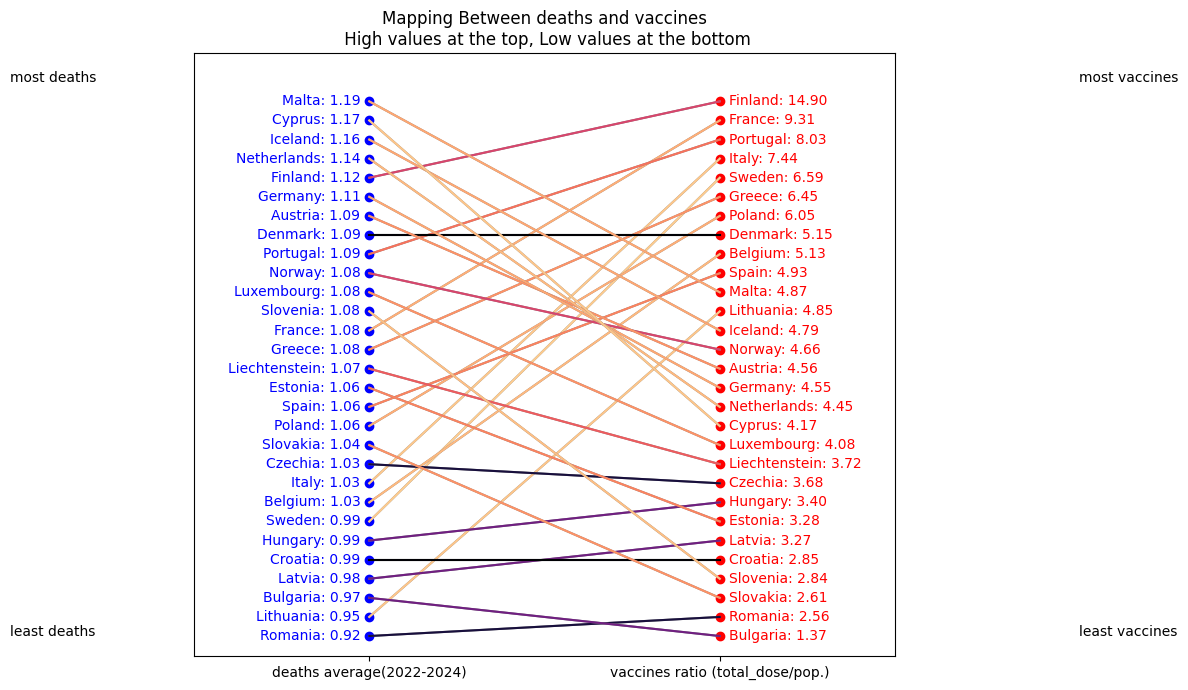

In [ ]:

# deaths values with out the NA
d = dxv.copy().dropna(subset=['value'])
d = d.sort_values(by='average(2022-2024)',ascending=True)
d = d.reset_index()

# vaccines values with out the NA
v = dxv.copy().dropna(subset=['value'])
v = v.sort_values(by='value',ascending=True)
v = v.reset_index()
v['rank'] = v['value'].rank()

# making sure the lists have the same values
d = d[d.abbr.isin(v.abbr)]
d = d.reset_index(drop=True)

# display(d)
# display(v)

# Create a plot
fig, ax = plt.subplots(figsize=(14, 7))

ydistance = 0.95

# Plot points for the first dataframe
for i, row in d.iterrows():
    ax.scatter(0, i * ydistance, label=row['name'], color='blue')
    ax.text(-0.025, i * ydistance, row['name'] + ': ' + f"{row['average(2022-2024)']:.2f}", ha='right', va='center', color='blue')

# Plot points for the second dataframe
for i, row in v.iterrows():
    ax.scatter(1, i * ydistance, label=row['name'], color='red')
    ax.text(1.025, i * ydistance, row['name'] + ': ' + f"{row['value']:.2f}", ha='left', va='center', color='red')


ax.text(-0.025 - 1.0, len(v) * ydistance, 'most deaths')
ax.text(-0.025 - 1.0, 0 * ydistance, 'least deaths')

ax.text(1.025 + 1.0, len(v) * ydistance, 'most vaccines')
ax.text(1.025 + 1.0, 0 * ydistance, 'least vaccines')

# Create a colormap
colormap = plt.get_cmap('magma')
norm = Normalize(vmin=-np.pi, vmax=np.pi)

# Draw lines connecting matching abbr values
for name in d['name']:
    if name in v['name'].values:
        idx1 = d[d['name'] == name].index[0] * ydistance
        idx2 = v[v['name'] == name].index[0] * ydistance
        ax.plot([0, 1], [idx1, idx2], color='gray', linestyle='-')
        vertical_diff = idx2 - idx1
        horizontal_diff = 1  # The horizontal distance between the columns
        angle = np.arctan2(vertical_diff, horizontal_diff)  # Calculate the angle

        # normalized_angle = (angle + 2 * np.pi) / (2 * np.pi )  # Normalize angle to [0, 1]
        normalized_angle = pow ( abs(angle / np.pi)/0.5, 3) # custom normalized angle for better colors
        # print(normalized_angle)

        color = colormap(normalized_angle)  # Map normalized angle to a color
        ax.plot([0, 1], [idx1, idx2], color=color, linestyle='-')

# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1, max(len(d), len(v)))
ax.set_xticks([0, 1])
ax.set_xticklabels(['deaths average(2022-2024)', 'vaccines ratio (total_dose/pop.)'])
ax.set_yticks([])
ax.set_title('Mapping Between deaths and vaccines\n High values at the top, Low values at the bottom')
ax.grid(False)
plt.tight_layout()
plt.show()


### Other death x vaccine charts

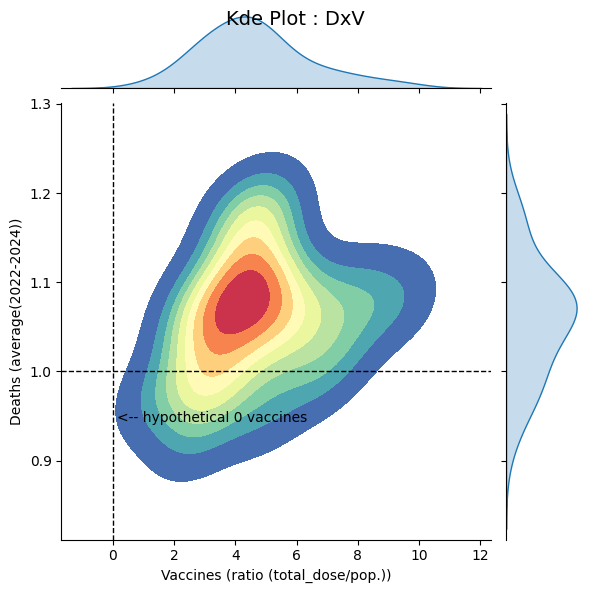

In [ ]:

temp = dxv[dxv.value < 14]
temp = temp.dropna(subset=['value'])

g = sns.jointplot(
    data=temp,
    x="value", 
    y="average(2022-2024)", 
    kind="kde",
    fill=True,
    cmap=heatmapCM
)
g.set_axis_labels( "Vaccines (ratio (total_dose/pop.))","Deaths (average(2022-2024))")

g.figure.suptitle("Kde Plot : DxV", fontsize=14)

# Add a title
plt.title("<-- hypothetical 0 vaccines", fontsize=10,x=0.35,y=0.25)

# Add vertical and horizontal lines
plt.axvline(x=0.0, color='black', linestyle='--', linewidth=1)  # Vertical line at x=20
plt.axhline(y=1.0, color='black', linestyle='--', linewidth=1)  # Horizontal line at y=3

# display(vdravg)
plt.show()


In [ ]:
title = 'Scatter Chart - DxV'
display(MD(f'### {title}'))

fig = px.scatter(
        dxv,
        x="value",      
        y="average(2022-2024)",       
        color="name",      
        hover_name="name",
        title=title,
        labels={
            "value": "Vaccines (ratio total_dose/pop.)",  # Custom X-axis label
            "average(2022-2024)": "Deaths average(2022-2024)"           # Custom Y-axis label
        },
        height=750
    )
fig.update_layout(template="plotly_dark")

fig.add_shape(
    type="line",
    x0=0, x1=dxv.value.max(),
    y0=1, y1=1, # Start and end y-coordinates
    line=dict(color="Red", width=2, dash="dash"),  # Line style
    xref="x", yref="y"          # Reference axes
)


fig.show()

### Scatter Chart - DxV

### Bad-Batch Theory 
#### There seems to be to be an unusual grouping/cluster
Where countries that have a vaccine (ratio total_dose/pop.) between 4.0-6.0, have an unusually high Deaths average(2022-2024) above 1.1.

#### Bad-Batch Theory (by Dr Vibeke Manniche)
A study in European Journal of Clinical Investigation found significant batch-dependent variations in adverse event reports for the Pfizer-BioNTech COVID-19 vaccine in Denmark (2020–2022), suggesting some batches had higher reported risks. Further investigation is needed.

* The Paper
    * [Batch-dependent safety of the BNT162b2 mRNA COVID-19 vaccine - by Dr Vibeke Manniche ](https://onlinelibrary.wiley.com/doi/10.1111/eci.13998)
* An Interview 
    * [Excess deaths, the silence - Dr John Campbell and Dr Vibeke Manniche (Youtube)](https://www.youtube.com/watch?v=nD--4tLmb3w)

* <img src='./docs/chrome_vTKng4rNsY.png' alt="." height="500px"/>  
* <img src='./chrome_vTKng4rNsY.png' alt="." style="height: 500px; width: auto;"/>
* <img src='./docs/eci13998-fig-0001-m.jpg' alt="." height="350px"/>  
* <img src='./eci13998-fig-0001-m.jpg' alt="." style="height: 350px; width: auto;"/>

#### my 2 cents
This is not suprising, the vaccine was created in a rushed manner ... and as a rule of thumb, `Haste Makes Waste`
* Ford Pinto (1971-1980)
* Windows Vista
* Samsung Galaxy Note 7 
* Boeing 737 MAX
* ... and so many more


## Lets look at some of the Causes of Death

In [276]:
# we'll copy the earlier dataframe
dvcod = dxv.copy()

# codn 
blood_related = [
    'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    'Hodgkin disease and lymphomas',
    'Other malignant neoplasms of lymphoid, haematopoietic, and related tissue',
    'Leukaemia',
    'Diabetes mellitus',
]
cancer_related = [
    "Malignant neoplasm of lip, oral cavity, pharynx",
    "Malignant neoplasm of colon, rectosigmoid junction, rectum, anus, and anal canal",
    "Malignant neoplasm of trachea, bronchus, and lung",
    "Malignant neoplasm of other parts of uterus",
    "Malignant neoplasm of brain and central nervous system",
    "Hodgkin disease and lymphomas",
    "Other malignant neoplasm of lymphoid, haematopoietic, and related tissue",
    "Leukaemia",
    "Other malignant neoplasms (remainder of C00-C97)",
    "Non-malignant neoplasms (benign and uncertain)"
]
heart_related = [
    "Ischaemic heart diseases",
    "Acute myocardial infarction including subsequent myocardial infarction",
    "Other ischaemic heart diseases",
    "Other heart diseases",
    "Cerebrovascular diseases",
    "Other diseases of the circulatory system (remainder of I00-I99)"
]
unknown_related = [
    "Ill-defined and unknown causes of mortality",
    "Other symptoms, signs and abnormal clinical and laboratory findings (remainder of R00-R99)",
    "Event of undetermined intent"
]
br = cd[(cd['source']=='cause_of_death') & (cd['filter'].isin(blood_related))   & (cd['value_type']=='normalized') & (cd['year'] >= 2022) & (cd['value'] > 0.0)]
cr = cd[(cd['source']=='cause_of_death') & (cd['filter'].isin(cancer_related))  & (cd['value_type']=='normalized') & (cd['year'] >= 2022) & (cd['value'] > 0.0)]
hr = cd[(cd['source']=='cause_of_death') & (cd['filter'].isin(heart_related))   & (cd['value_type']=='normalized') & (cd['year'] >= 2022) & (cd['value'] > 0.0)]
ur = cd[(cd['source']=='cause_of_death') & (cd['filter'].isin(unknown_related)) & (cd['value_type']=='normalized') & (cd['year'] >= 2022) & (cd['value'] > 0.0)]

codlist = [
    {"df":br,"desc":'blood_related'},
    {"df":cr,"desc":'cancer_related'},
    {"df":hr,"desc":'heart_related'},
    {"df":ur,"desc":'unknown_related'}
]

for i in codlist:
    temp = pd.pivot_table(
        data = i['df'],
        values = 'value',
        index = ['name','abbr'],
        columns=['year'],
        aggfunc='mean',
    )
    # temp = temp.rename(columns={'value':f"{i['desc']}_avg(>2022)"})
    temp = temp.sort_values(by=2022)
    display(temp)

# for y in range(2015,2025,1):
#     try:
#         dvcod = dvcod.rename(columns={y:f"{y}_deaths"})
#     except:
#         pass

# for i in codlist:
#     temp = pd.pivot_table(
#         data = i['df'],
#         values = 'value',
#         index = ['name'],
#         columns=['year'],
#         aggfunc='mean',
#     )
#     temp = temp.rename(columns={'value':i['desc']})
#     dvcod = pd.merge(dvcod,temp, how='left',on='name')
    
#     for y in range(2015,2025,1):
#         try:
#             dvcod = dvcod.rename(columns={y:f"{y}_{i['desc']}"})
#         except:
#             pass 

#     display(dvcod)


# display(dvcod)


,year,2022,2023
name,abbr,,
Bulgaria,BG,0.780,NaN
Luxembourg,LU,0.909,NaN
Türkiye,Unknown,0.932,NaN
Serbia,RS,0.984,NaN
Belgium,BE,0.993,NaN
Switzerland,CH,1.005,NaN
Sweden,SE,1.006,NaN
Latvia,LV,1.018,NaN
Denmark,DK,1.025,NaN


,year,2022,2023
name,abbr,,
Bulgaria,BG,0.862,NaN
Croatia,HR,0.897,NaN
Belgium,BE,0.928,NaN
Hungary,HU,0.969,NaN
Latvia,LV,0.971,NaN
Türkiye,Unknown,0.971,NaN
Italy,IT,0.996,NaN
Sweden,SE,0.997,NaN
Switzerland,CH,1.002,NaN


,year,2022,2023
name,abbr,,
Luxembourg,LU,0.840,NaN
Sweden,SE,0.879,NaN
Belgium,BE,0.880,NaN
Slovenia,SI,0.910,NaN
Czechia,CZ,0.927,0.876
Italy,IT,0.930,NaN
Austria,AT,0.933,0.901
Cyprus,CY,0.940,NaN
Denmark,DK,0.953,NaN


,year,2022,2023
name,abbr,,
Slovakia,SK,0.732,0.514
Lithuania,LT,0.846,NaN
Estonia,EE,0.873,NaN
Cyprus,CY,0.983,NaN
Sweden,SE,0.988,NaN
Serbia,RS,1.064,NaN
Poland,PL,1.165,NaN
Germany,DE,1.341,NaN
Liechtenstein,LI,1.350,3.150


# BookMark

In [128]:
# display(MD('### HeatMap (of deaths based on age groups)'))


## this is how we will sort 
sums = pd.pivot_table(
cd[(cd['source']=='deaths') & (cd['filter']=='TOTAL') & (cd['value_type']=='normalized') & (cd['year'] > 2023)], # totals only 
values = 'value',
index = ['abbr','name'],
aggfunc='sum',
)
sums = sums.reset_index()
sums = sums.sort_values(by='value',ascending=False)

heads = sums.head(10)
tails = sums.tail(10)

tempD = cd[(cd['source']=='deaths') & (cd['filter']=='TOTAL') & (cd['value_type']=='normalized')]
tempD_head = tempD[tempD.name.isin(heads.name)]
tempD_tail = tempD[tempD.name.isin(tails.name)]


tempV = cd[(cd['source']=='vaccine') & (cd['filter']=='All') & (cd['value_type']=='ratio (total_dose/pop.)')]
tempV_head = tempV[tempV.name.isin(heads.name)]
tempV_tail = tempV[tempV.name.isin(tails.name)]


# Create the figure
fig = go.Figure()

names = tempD_head.name.drop_duplicates().to_list()
for n in names:
    fig.add_trace(go.Scatter(
        x=tempD_head[tempD_head.name == n]['year'], 
        y=tempD_head[tempD_head.name == n]['value'], 
        mode='lines', 
        name=f"{n} deaths",
        legendgroup="group1",
        yaxis='y1'
        )
        )

names = tempD_tail.name.drop_duplicates().to_list()
for n in names:
    fig.add_trace(go.Scatter(
        x=tempD_tail[tempD_tail.name == n]['year'], 
        y=tempD_tail[tempD_tail.name == n]['value'], 
        mode='lines', 
        name=f"{n} deaths",
        legendgroup="group2",
        yaxis='y1'
        )
        )

names = tempV_head.name.drop_duplicates().to_list()
for n in names:
    fig.add_trace(go.Scatter(
        x=tempV_head[tempV_head.name == n]['year'], 
        y=tempV_head[tempV_head.name == n]['value'], 
        mode='lines', 
        name=f"{n} vaccines",
        legendgroup="group3",
        yaxis='y2'
        )
        )
    
names = tempV_tail.name.drop_duplicates().to_list()
for n in names:
    fig.add_trace(go.Scatter(
        x=tempV_tail[tempV_tail.name == n]['year'], 
        y=tempV_tail[tempV_tail.name == n]['value'], 
        mode='lines', 
        name=f"{n} vaccines",
        legendgroup="group4",
        yaxis='y2'
        )
        )

# Show the figure
fig.update_layout(
    template="plotly_dark",
    title="Plot with Two Y-Axes",
    xaxis=dict(title="X Axis"),
    yaxis=dict(title="Primary Y Axis", side="left", showgrid=False),
    yaxis2=dict(
        title="Secondary Y Axis",
        overlaying="y",
        side="right",
        showgrid=False
    ),
    height=750
    )
fig.show()



### Specific Examples
here i want to focus on a few notable findings 


# bookmark

In [129]:
## this will order by high to low deaths after 2023 (pre-pandemic)
sums = pd.pivot_table(
    ddn[ddn.agegrp == 'TOTAL'][ddn.year >= 2023], # totals only 
    values = 'deaths_norm',
    index = ['abbr','name'],
    aggfunc='sum',
)
sums = sums.reset_index()
sums = sums.sort_values(by='deaths_norm',ascending=False)
# display(sums)

display(MD('### HeatMap (based on Year)'))
temp = pd.pivot_table(
    ddn[ddn.agegrp == 'TOTAL'], # totals only 
    values = 'deaths_norm',
    index = ['abbr','name'],
    columns=['year'],
    aggfunc='mean',
)
temp.columns.name = 'index' 

# temp = temp.sort_values(by=2024,ascending=False)
temp = temp.reset_index()
temp = temp.set_index('name').reindex(sums['name']).reset_index()

display(temp.style.background_gradient(cmap=heatmapCM,axis=1))

C:\Users\JGarza\AppData\Local\Temp\ipykernel_2148\151973392.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### HeatMap (based on Year)

index,name,abbr,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Malta,MT,1.016949,0.955701,1.027350,1.060863,1.064330,1.199538,1.196071,1.219183,1.161980,1.184373
1,Iceland,IS,0.988146,1.020151,0.991702,1.000148,1.005927,1.042377,1.039265,1.195733,1.140169,1.156252
2,Netherlands,NL,1.003373,0.993167,1.003460,1.024649,1.015107,1.147749,1.140424,1.133556,1.131250,1.143136
3,Cyprus,CY,1.029186,0.937156,1.033658,0.997362,1.069610,1.143922,1.241800,1.239908,1.150459,1.112573
4,Ireland,IE,1.007002,0.998439,0.994559,1.013608,1.002031,1.041412,1.098655,1.128063,1.125593,1.106379
5,Finland,FI,0.996378,1.003504,1.000118,1.016952,1.004682,1.051873,1.076956,1.155757,1.143393,1.064547
6,Germany,DE,1.016481,0.979311,1.004209,1.029001,1.012227,1.082065,1.101127,1.149954,1.106922,1.074998
7,Luxembourg,LU,0.992076,0.966098,1.041827,1.053835,1.050895,1.143779,1.100400,1.089127,1.081529,1.080324
8,Denmark,DK,1.007454,0.991352,1.001194,1.038393,1.014429,1.045972,1.075440,1.117541,1.090769,1.064901
9,Austria,AT,1.023795,0.972870,1.003336,1.012615,1.006371,1.125312,1.104853,1.130013,1.081778,1.062992


In [130]:
## this will order by high to low deaths after 2023 (pre-pandemic)
sums = pd.pivot_table(
    ddn[ddn.agegrp == 'LT80'][ddn.year >= 2023], # totals only 
    values = 'deaths_norm',
    index = ['abbr','name'],
    aggfunc='sum',
)
sums = sums.reset_index()
sums = sums.sort_values(by='deaths_norm',ascending=False)
# display(sums)

display(MD('### HeatMap (based on Year, only where agegrp is LT80)'))
temp = pd.pivot_table(
    ddn[ddn.agegrp == 'LT80'], # totals only 
    values = 'deaths_norm',
    index = ['abbr','name'],
    columns=['year'],
    aggfunc='mean',
)
temp.columns.name = 'index' 

# temp = temp.sort_values(by=2024,ascending=False)
temp = temp.reset_index()
temp = temp.set_index('name').reindex(sums['name']).reset_index()

display(temp.style.background_gradient(cmap=heatmapCM,axis=1))

C:\Users\JGarza\AppData\Local\Temp\ipykernel_2148\3268976977.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### HeatMap (based on Year, only where agegrp is LT80)

index,name,abbr,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Iceland,IS,0.963504,1.036496,1.000000,1.019812,1.012513,1.105318,1.123045,1.273201,1.211679,1.256991
1,Malta,MT,1.017293,0.967203,1.015504,1.057841,1.036971,1.166369,1.196780,1.207513,1.124031,1.158677
2,Netherlands,NL,1.009040,0.998123,0.992837,1.013964,1.004492,1.114691,1.143528,1.122958,1.113380,1.110753
3,Norway,NO,1.003819,0.998207,0.997974,1.013113,1.015627,1.033864,1.050348,1.137911,1.107398,1.106405
4,Cyprus,CY,1.026756,0.958661,1.014583,1.020289,1.053005,1.140122,1.280878,1.213923,1.143546,1.059914
5,France,FR,1.012897,0.989268,0.997835,1.006304,1.003646,1.094593,1.112343,1.124722,1.086984,1.075147
6,Spain,ES,1.029906,0.983827,0.986268,0.997999,0.994437,1.164643,1.109420,1.114142,1.082376,1.065384
7,Finland,FI,1.000246,1.000328,0.999426,0.998402,0.988075,1.026145,1.040611,1.090771,1.100033,1.044840
8,Poland,PL,1.017801,0.981581,1.000618,1.023203,1.018394,1.181092,1.309963,1.115682,1.035903,1.025043
9,Luxembourg,LU,0.979849,0.945681,1.074470,1.028211,1.006658,1.077098,1.061854,1.024006,1.026108,1.027335


## Conclusion